# Устранение пропусков в данных

**Проблема.** Если в данных есть пропуски, то большинство алгоритмов машинного обучения не будет с ними работать. Даже корреляционная матрица не будет строиться корректно.

Существуют различные способы устранения пропусков в данных, которые связаны с удалением или заполнением пропусков.

## Загрузка и первичный анализ данных

Используем данные из соревнования [House Prices: Advanced Regression Techniques.](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from IPython.display import Image
%matplotlib inline 
sns.set(style="ticks")

In [2]:
# Будем использовать только обучающую выборку
hdata = pd.read_excel('./ALF_Data.xlsx')
hdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8785 entries, 0 to 8784
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     8785 non-null   int64  
 1   Gender                  8785 non-null   object 
 2   Region                  8785 non-null   object 
 3   Weight                  8591 non-null   float64
 4   Height                  8594 non-null   float64
 5   Body Mass Index         8495 non-null   float64
 6   Obesity                 8495 non-null   float64
 7   Waist                   8471 non-null   float64
 8   Maximum Blood Pressure  8481 non-null   float64
 9   Minimum Blood Pressure  8409 non-null   float64
 10  Good Cholesterol        8768 non-null   float64
 11  Bad Cholesterol         8767 non-null   float64
 12  Total Cholesterol       8769 non-null   float64
 13  Dyslipidemia            8785 non-null   int64  
 14  PVD                     8785 non-null   

In [3]:
hdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8785 entries, 0 to 8784
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     8785 non-null   int64  
 1   Gender                  8785 non-null   object 
 2   Region                  8785 non-null   object 
 3   Weight                  8591 non-null   float64
 4   Height                  8594 non-null   float64
 5   Body Mass Index         8495 non-null   float64
 6   Obesity                 8495 non-null   float64
 7   Waist                   8471 non-null   float64
 8   Maximum Blood Pressure  8481 non-null   float64
 9   Minimum Blood Pressure  8409 non-null   float64
 10  Good Cholesterol        8768 non-null   float64
 11  Bad Cholesterol         8767 non-null   float64
 12  Total Cholesterol       8769 non-null   float64
 13  Dyslipidemia            8785 non-null   int64  
 14  PVD                     8785 non-null   

In [4]:
hdata.shape

(8785, 30)

In [5]:
hdata.head(10)

,Age,Gender,Region,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,...,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
0,65,M,east,56.0,162.1,21.31,0.0,83.6,135.0,71.0,...,0.0,1,0.0,0,0.0,1,1.0,0.0,0.0,0.0
1,36,M,south,60.2,162.2,22.88,0.0,76.6,96.0,52.0,...,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
2,66,M,east,83.9,162.5,31.77,1.0,113.2,115.0,57.0,...,0.0,1,0.0,0,1.0,0,0.0,0.0,0.0,0.0
3,54,M,east,69.4,160.5,26.94,0.0,77.9,110.0,57.0,...,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0
4,63,M,north,73.1,159.2,28.84,0.0,89.3,132.0,73.0,...,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0
5,26,F,east,119.3,193.2,31.96,1.0,117.9,129.0,70.0,...,0.0,0,0.0,1,0.0,0,0.0,0.0,0.0,0.0
6,66,F,north,85.1,172.1,28.73,0.0,99.2,137.0,92.0,...,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0
7,59,M,east,69.9,160.9,27.00,0.0,101.5,124.0,73.0,...,0.0,0,0.0,1,1.0,1,0.0,0.0,0.0,0.0
8,53,M,east,75.2,174.1,24.81,0.0,85.6,110.0,74.0,...,0.0,1,1.0,1,0.0,0,0.0,0.0,0.0,0.0
9,78,M,north,47.6,155.3,19.74,0.0,70.3,170.0,78.0,...,0.0,0,1.0,0,1.0,1,1.0,0.0,NaN,0.0


## Удаление пропущенных значений

**Допущение:** пропуски распределены случайным образом.

**Когда рекомендуется использовать?**
- Если пропущенных данных слишком много и возникает опасность нарушить распределение исходных данных при заполнении пропусков. Рекомендуется удалять признак (колонку) целиком.
- Если датасет большой и пропущенных данных относительно немного, то рекомендуется удалять строки, содержащие пропуски в данных.
- Под "немного" в идеальном случае понимается 5% от выборки.

**Преимущества:**
- Простота реализации.
- При случайном распределении пропусков сохраняются параметры распределения исходных данных.

**Недостатки:**
- Может быть удален большой фрагмент данных при неудачном распределении пропусков в нескольких столбцах.
- Если пропуски распределены не случайно, то можно удалить значимые данные.

In [6]:
list(zip(hdata.columns, [i for i in hdata.dtypes]))

[('Age', dtype('int64')),
 ('Gender', dtype('O')),
 ('Region', dtype('O')),
 ('Weight', dtype('float64')),
 ('Height', dtype('float64')),
 ('Body Mass Index', dtype('float64')),
 ('Obesity', dtype('float64')),
 ('Waist', dtype('float64')),
 ('Maximum Blood Pressure', dtype('float64')),
 ('Minimum Blood Pressure', dtype('float64')),
 ('Good Cholesterol', dtype('float64')),
 ('Bad Cholesterol', dtype('float64')),
 ('Total Cholesterol', dtype('float64')),
 ('Dyslipidemia', dtype('int64')),
 ('PVD', dtype('int64')),
 ('Physical Activity', dtype('float64')),
 ('Education', dtype('float64')),
 ('Unmarried', dtype('float64')),
 ('Income', dtype('float64')),
 ('Source of Care', dtype('O')),
 ('PoorVision', dtype('float64')),
 ('Alcohol Consumption', dtype('int64')),
 ('HyperTension', dtype('float64')),
 ('Family  HyperTension', dtype('int64')),
 ('Diabetes', dtype('float64')),
 ('Family Diabetes', dtype('int64')),
 ('Hepatitis', dtype('float64')),
 ('Family Hepatitis', dtype('float64')),
 ('Ch

In [7]:
# Колонки с пропусками
hcols_with_na = [c for c in hdata.columns if hdata[c].isnull().sum() > 0]
hcols_with_na

['Weight',
 'Height',
 'Body Mass Index',
 'Obesity',
 'Waist',
 'Maximum Blood Pressure',
 'Minimum Blood Pressure',
 'Good Cholesterol',
 'Bad Cholesterol',
 'Total Cholesterol',
 'Physical Activity',
 'Education',
 'Unmarried',
 'Income',
 'PoorVision',
 'HyperTension',
 'Diabetes',
 'Hepatitis',
 'Family Hepatitis',
 'Chronic Fatigue',
 'ALF']

In [8]:
# Количество пропусков
[(c, hdata[c].isnull().sum()) for c in hcols_with_na]

[('Weight', 194),
 ('Height', 191),
 ('Body Mass Index', 290),
 ('Obesity', 290),
 ('Waist', 314),
 ('Maximum Blood Pressure', 304),
 ('Minimum Blood Pressure', 376),
 ('Good Cholesterol', 17),
 ('Bad Cholesterol', 18),
 ('Total Cholesterol', 16),
 ('Physical Activity', 10),
 ('Education', 20),
 ('Unmarried', 452),
 ('Income', 1161),
 ('PoorVision', 563),
 ('HyperTension', 80),
 ('Diabetes', 2),
 ('Hepatitis', 22),
 ('Family Hepatitis', 6),
 ('Chronic Fatigue', 35),
 ('ALF', 2785)]

In [9]:
# Доля (процент) пропусков
[(c, hdata[c].isnull().mean()) for c in hcols_with_na]

[('Weight', 0.022083096186681844),
 ('Height', 0.02174160500853728),
 ('Body Mass Index', 0.033010813887307915),
 ('Obesity', 0.033010813887307915),
 ('Waist', 0.03574274331246443),
 ('Maximum Blood Pressure', 0.03460443938531588),
 ('Minimum Blood Pressure', 0.04280022766078543),
 ('Good Cholesterol', 0.0019351166761525328),
 ('Bad Cholesterol', 0.0020489470688673877),
 ('Total Cholesterol', 0.001821286283437678),
 ('Physical Activity', 0.0011383039271485487),
 ('Education', 0.0022766078542970974),
 ('Unmarried', 0.0514513375071144),
 ('Income', 0.1321570859419465),
 ('PoorVision', 0.06408651109846329),
 ('HyperTension', 0.00910643141718839),
 ('Diabetes', 0.00022766078542970974),
 ('Hepatitis', 0.002504268639726807),
 ('Family Hepatitis', 0.0006829823562891292),
 ('Chronic Fatigue', 0.00398406374501992),
 ('ALF', 0.3170176437108708)]

In [10]:
# Колонки для которых удаляются пропуски
hcols_with_na_temp = ['Weight', 'Height', 'Minimum Blood Pressure', 'Maximum Blood Pressure']

Удаление колонок, содержащих пустые значения
`res = data.dropna(axis=1, how='any')`

Удаление строк, содержащих пустые значения
`res = data.dropna(axis=0, how='any')`

[Документация](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

**Удаление может производиться для группы строк или колонок.**

In [11]:
# Удаление пропусков
hdata_drop = hdata[hcols_with_na_temp].dropna()
hdata_drop.shape

(8188, 4)

In [12]:
def plot_hist_diff(old_ds, new_ds, cols):
    """
    Разница между распределениями до и после устранения пропусков
    """
    for c in cols:   
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.title.set_text('Поле - ' + str(c))
        old_ds[c].hist(bins=50, ax=ax, density=True, color='green', figsize=(15, 8))
        new_ds[c].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.5, figsize=(15, 8))
        plt.show()

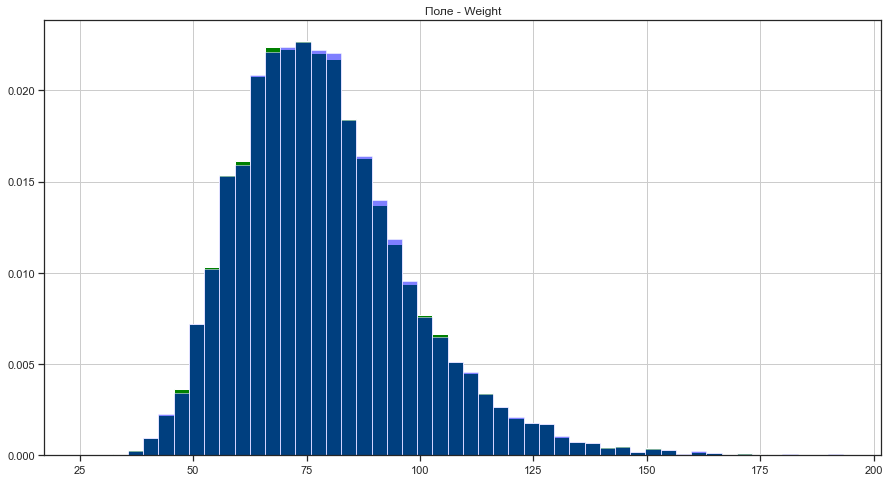

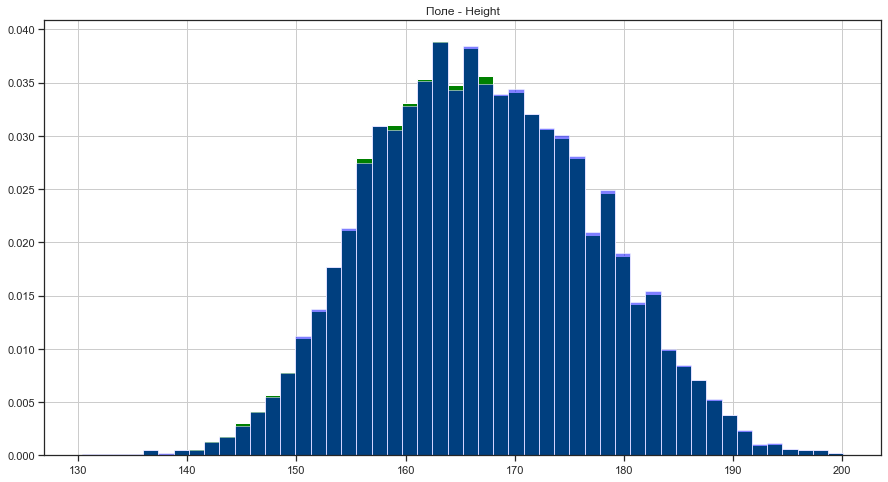

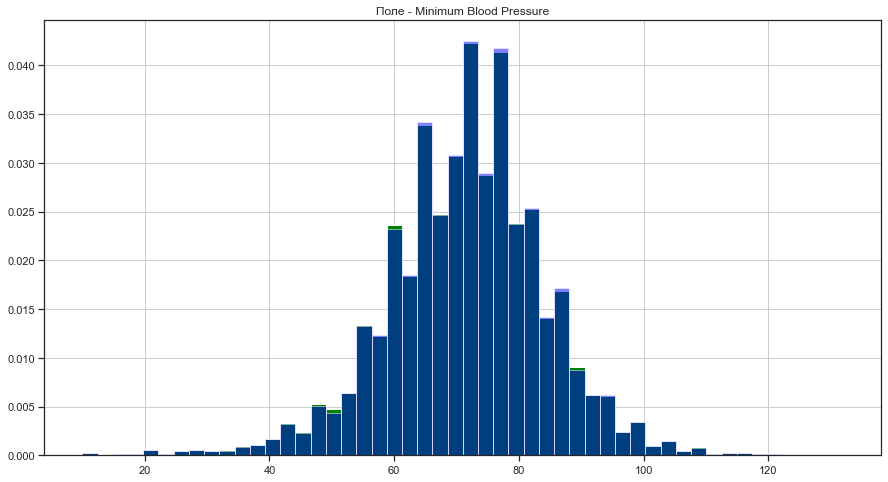

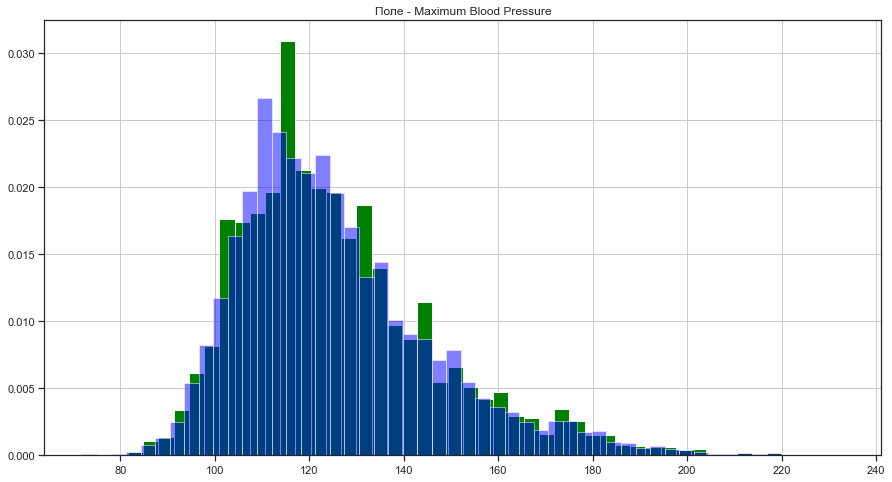

In [13]:
plot_hist_diff(hdata, hdata_drop, hcols_with_na_temp)

## Заполнение значений для одного признака

В этом случае данные которые находятся в соседних признаках  (колонках) не учитываются при заполнении.

**Заполнение (внедрение) значений или импьютация (imputation)** - это заполнение пропущенных значений их статистическими оценками.

**Для числовых признаков:**
- Заполнение [показателями центра распределения](https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%BA%D0%B0%D0%B7%D0%B0%D1%82%D0%B5%D0%BB%D0%B8_%D1%86%D0%B5%D0%BD%D1%82%D1%80%D0%B0_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F).
- Заполнение константой. *Полезно в случае "неслучайного" распределения пропусков.*
- Заполнение "хвостом распределения".

**Для категориальных признаков:**
- Заполнение наиболее распространенным значением категории (аналогом моды).
- Введение отдельного значения категории для пропущенных значений.

**Для числовых и категориальных признаков:**
- Добавления флага пропусков.
- Заполнение случайным значением признака. *Метод обычно применяют на больших выборках. Преимуществом является то, что он сохраняет дисперсию исходной выборки.*



### Заполнение [показателями центра распределения](https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%BA%D0%B0%D0%B7%D0%B0%D1%82%D0%B5%D0%BB%D0%B8_%D1%86%D0%B5%D0%BD%D1%82%D1%80%D0%B0_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F) и константой

**Для числовых признаков.**

**Когда рекомендуется использовать?**
- Если пропуски распределены случайным образом.
- В идеальном случае пропусков не более 5% от выборки.

**Какой показатель центра распределения лучше использовать?**
- Если распределение одномодальное, то лучше использовать моду, иначе математическое ожидание или медиану.
- Не существует однозначного предпочтения между математическим ожиданием или медианой. Но медиана более устойчива к выбросам в данных. 

Для внедрение) значений может быть использован класс [SimpleImputer.](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

Для фильтрации пропущенных значений может быть использован класс [MissingIndicator.](https://scikit-learn.org/stable/modules/generated/sklearn.impute.MissingIndicator.html)

In [15]:
# Пример работы MissingIndicator
temp_x1 = np.array([[np.nan, 1, 3], [4, 0, np.nan], [8, 1, 0]])
print('Исходный массив:')
print(temp_x1)
indicator = MissingIndicator()
temp_x1_transformed = indicator.fit_transform(temp_x1)
print('Маска пропущенных значений:')
print(temp_x1_transformed)

Исходный массив:
[[nan  1.  3.]
 [ 4.  0. nan]
 [ 8.  1.  0.]]
Маска пропущенных значений:
[[ True False]
 [False  True]
 [False False]]


In [16]:
def impute_column(dataset, column, strategy_param, fill_value_param=None):
    """
    Заполнение пропусков в одном признаке
    """
    temp_data = dataset[[column]].values
    size = temp_data.shape[0]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imputer = SimpleImputer(strategy=strategy_param, 
                            fill_value=fill_value_param)
    all_data = imputer.fit_transform(temp_data)
    
    missed_data = temp_data[mask_missing_values_only]
    filled_data = all_data[mask_missing_values_only]
    
    return all_data.reshape((size,)), filled_data, missed_data

In [17]:
all_data, filled_data, missed_data = impute_column(hdata, 'Maximum Blood Pressure', 'mean')
all_data

array([135.,  96., 115., ..., 144., 121., 125.])

In [18]:
filled_data

array([125.83221318, 125.83221318, 125.83221318, 125.83221318,
       125.83221318, 125.83221318, 125.83221318, 125.83221318,
       125.83221318, 125.83221318, 125.83221318, 125.83221318,
       125.83221318, 125.83221318, 125.83221318, 125.83221318,
       125.83221318, 125.83221318, 125.83221318, 125.83221318,
       125.83221318, 125.83221318, 125.83221318, 125.83221318,
       125.83221318, 125.83221318, 125.83221318, 125.83221318,
       125.83221318, 125.83221318, 125.83221318, 125.83221318,
       125.83221318, 125.83221318, 125.83221318, 125.83221318,
       125.83221318, 125.83221318, 125.83221318, 125.83221318,
       125.83221318, 125.83221318, 125.83221318, 125.83221318,
       125.83221318, 125.83221318, 125.83221318, 125.83221318,
       125.83221318, 125.83221318, 125.83221318, 125.83221318,
       125.83221318, 125.83221318, 125.83221318, 125.83221318,
       125.83221318, 125.83221318, 125.83221318, 125.83221318,
       125.83221318, 125.83221318, 125.83221318, 125.83

In [19]:
missed_data

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [20]:
def research_impute_numeric_column(dataset, num_column, const_value=None):
    strategy_params = ['mean', 'median', 'most_frequent', 'constant']
    strategy_params_names = ['Среднее', 'Медиана', 'Мода']
    strategy_params_names.append('Константа = ' + str(const_value))
    
    original_temp_data = dataset[[num_column]].values
    size = original_temp_data.shape[0]
    original_data = original_temp_data.reshape((size,))
    
    new_df = pd.DataFrame({'Исходные данные':original_data})
       
    for i in range(len(strategy_params)):
        strategy = strategy_params[i]
        col_name = strategy_params_names[i]
        if (strategy!='constant') or (strategy == 'constant' and const_value!=None):
            if strategy == 'constant':
                temp_data, _, _ = impute_column(dataset, num_column, strategy, fill_value_param=const_value)
            else:
                temp_data, _, _ = impute_column(dataset, num_column, strategy)
            new_df[col_name] = temp_data
        
    sns.kdeplot(data=new_df)

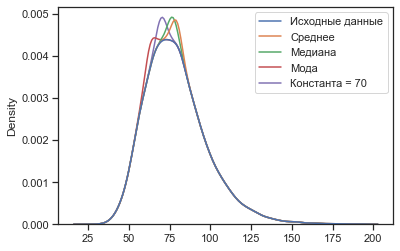

In [21]:
research_impute_numeric_column(hdata, 'Weight',70)

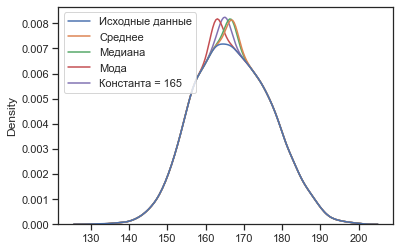

In [22]:
research_impute_numeric_column(hdata, 'Height',165)

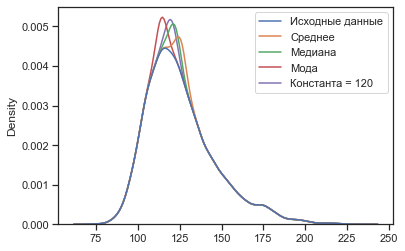

In [23]:
research_impute_numeric_column(hdata, 'Maximum Blood Pressure',120)

### Заполнение "хвостом распределения"

**Для числовых признаков.**

**Допущение:** пропуски распределены НЕ случайным образом. Мы хотим выделить пропущенные значения из остальных значений.

**Преимущества:**
- Простота реализации.
- Выделяет пропущенные значения из остальных значений.

**Недостатки:**
- Нарушение параметров исходного распределения.
- Поскольку значения на краю распределения фактически являются аномалиями (выбросами), то данный подход может пересекаться с алгоритмами поиска аномалий.

**Как вычислить "хвост распределения"?**

Если распределение данных признака $f$ напоминает нормальное:

$$ extreme\_value = mean(f) + 3 \cdot std(f) $$

Для ассиметричного распределения:

$$ IQR = Q3-Q1 $$

$IQR -$ interquartile range.

$$ extreme\_value = Q3 + K \cdot IQR $$

Значение $K$ обычно выбирается равным $1,5$. Но для экстремальных выбросов выбирают $K=3$.



In [70]:
# Похоже на нормальное
Height_ev = hdata['Height'].mean() + 3*hdata['Height'].std()
Height_ev

197.33847485871084

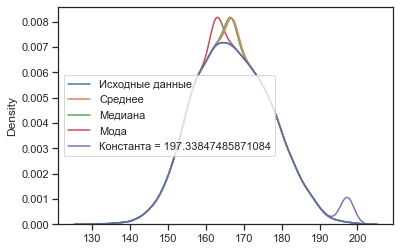

In [25]:
research_impute_numeric_column(hdata, 'Height', Height_ev)

In [26]:
# Ассиметричное
IQR = hdata['Maximum Blood Pressure'].quantile(0.75) - hdata['Maximum Blood Pressure'].quantile(0.25)
MaxBldPrs_ev1 = hdata['Maximum Blood Pressure'].quantile(0.75) + 3*IQR
print('IQR={}, extreme_value={}'.format(IQR, MaxBldPrs_ev1))

IQR=25.0, extreme_value=211.0


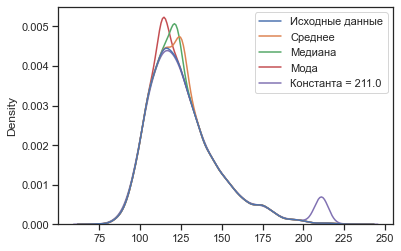

In [27]:
research_impute_numeric_column(hdata, 'Maximum Blood Pressure', MaxBldPrs_ev1)

In [28]:
MaxBldPrs_ev2 = hdata['Maximum Blood Pressure'].quantile(0.75) + 1.5*IQR
print('IQR={}, extreme_value={}'.format(IQR, MaxBldPrs_ev2))

IQR=25.0, extreme_value=173.5


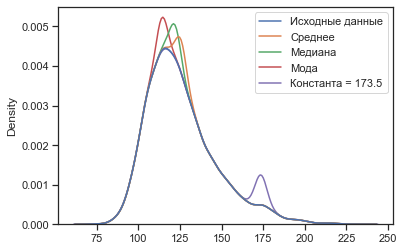

In [29]:
research_impute_numeric_column(hdata, 'Maximum Blood Pressure', MaxBldPrs_ev2)

In [30]:
IQR_lf = hdata['Height'].quantile(0.75) - hdata['Height'].quantile(0.25)
Height_ev1 = hdata['Height'].quantile(0.75) + 1.5*IQR_lf
Height_ev2 = hdata['Height'].quantile(0.75) + 3*IQR_lf

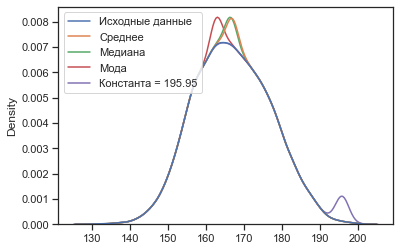

In [31]:
research_impute_numeric_column(hdata, 'Height', Height_ev1)

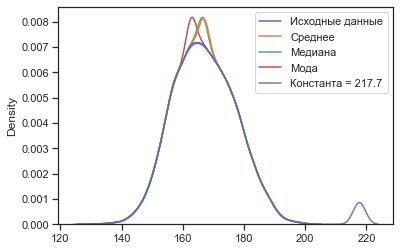

In [32]:
research_impute_numeric_column(hdata, 'Height', Height_ev2)

### Заполнение наиболее распространенным значением категории

**Для категориальных признаков.**

**Допущение:** пропуски распределены случайным образом. Заполнение пропусков наиболее распространенным значением категории в наименьшей степени повлияет на исходное распределение.

In [33]:
# 'Unmarried',
hdata_cat_cols = ['Unmarried', 'PoorVision']
hdata_cat_new = hdata[hdata_cat_cols].copy() 

In [34]:
PoolQC_cat_new_temp, _, _ = impute_column(hdata_cat_new, 'Unmarried', 'most_frequent')
Fence_cat_new_temp, _, _ = impute_column(hdata_cat_new, 'PoorVision', 'most_frequent')

In [35]:
hdata_cat_new['Unmarried'] = PoolQC_cat_new_temp
hdata_cat_new['PoorVision'] = Fence_cat_new_temp

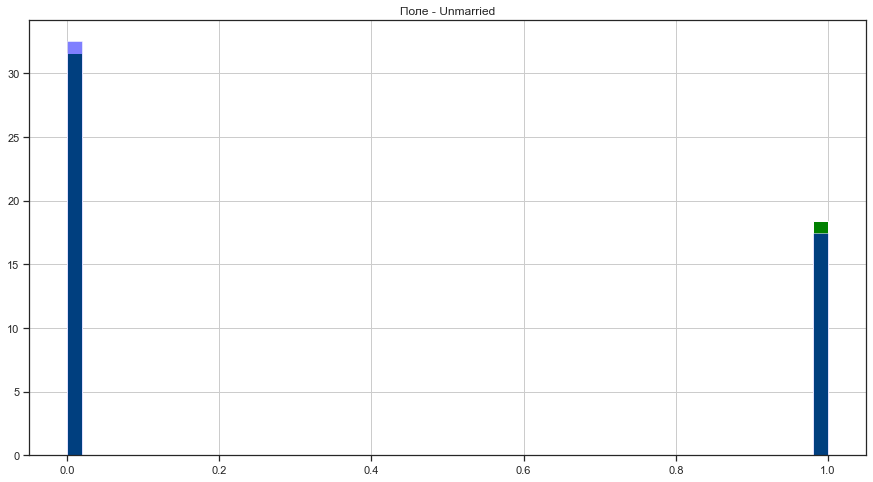

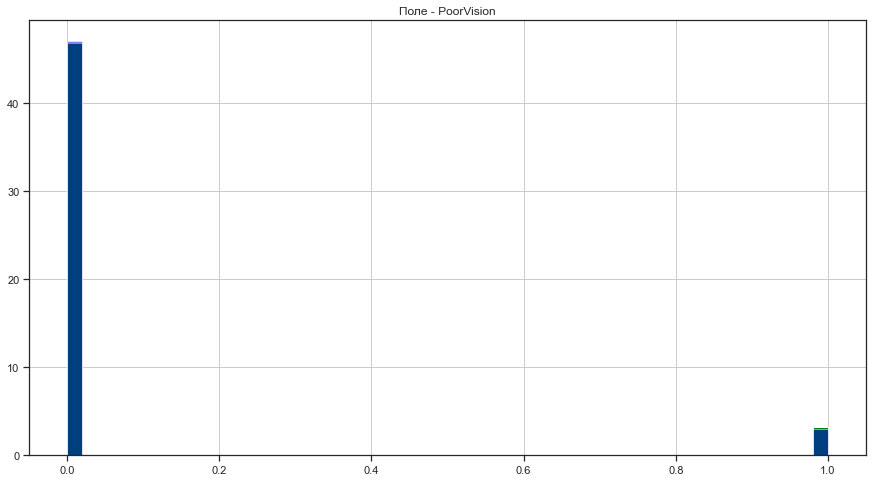

In [36]:
plot_hist_diff(hdata, hdata_cat_new, hdata_cat_cols)

### Введение отдельного значения категории для пропущенных значений

**Для категориальных признаков.**

**Основное преимущество подхода** состоит в том, что не дается никаких предположений о распределении  пропущенных значений.

In [37]:
hdata_cat_cols = ['Unmarried', 'PoorVision']
hdata_cat_na = hdata[hdata_cat_cols].copy().astype('object')
hdata_cat_na = hdata_cat_na.replace({np.nan:'NA',0:'False',1:'True'})
hdata_cat_na.head()


,Unmarried,PoorVision
0,False,False
1,NA,False
2,True,False
3,False,False
4,False,False


In [38]:
# 'Waist', 'Unmarried', 'PoorVision'
PoolQC_cat_na_temp, _, _ = impute_column(hdata_cat_na, 'Unmarried', 'constant', fill_value_param='NA')
Fence_cat_na_temp, _, _ = impute_column(hdata_cat_na, 'PoorVision', 'constant', fill_value_param='NA')

In [39]:
hdata_cat_na['Unmarried'] = PoolQC_cat_na_temp
hdata_cat_na['PoorVision'] = Fence_cat_na_temp

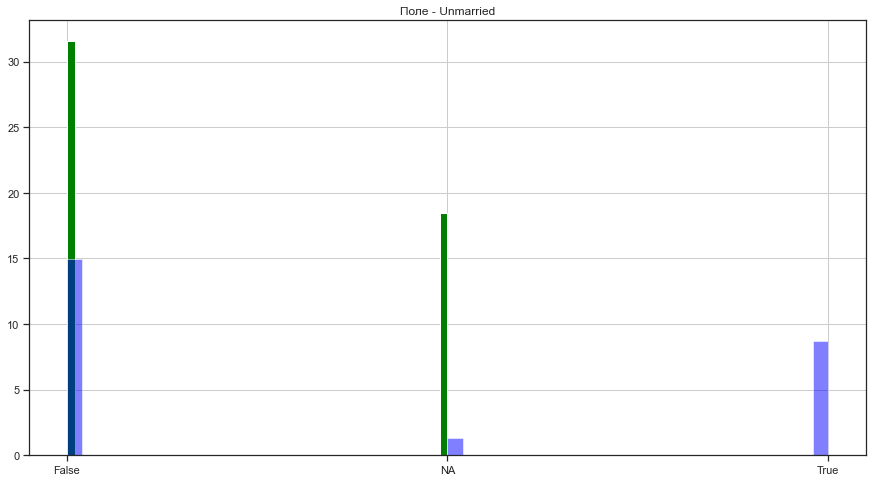

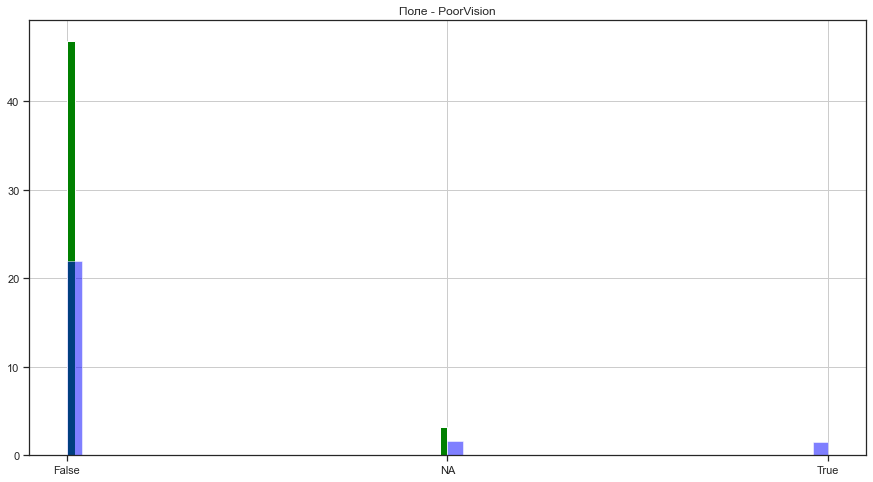

In [40]:
plot_hist_diff(hdata, hdata_cat_na, hdata_cat_cols)

### Добавления флага пропусков

**Для любых признаков.**

Для каждой колонки данных вводится дополнительная бинарная колонка, в которой пустым значениям признака соответствует 1.

**Преимущества:**
- Модель получает дополнительную информацию о том, насколько мы уверены в наших данных. Особенно хорошо этот подход работает для деревьев решений и производных моделей.

**Недостатки:**
- Расширяется признаковое пространство.
- Заполнять пропуски для исходных колонок все равно необходимо.
- Флаги для разных колонок могут сильно коррелировать между собой.

In [65]:
hdata_mis = hdata[['Income']].copy()
hdata_mis.head(10)

,Income
0,1.0
1,1.0
2,0.0
3,0.0
4,NaN
5,0.0
6,0.0
7,0.0
8,1.0
9,0.0


In [67]:
indicator = MissingIndicator()
PoolQC_missing = indicator.fit_transform(hdata_mis[['Income']])
PoolQC_missing

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [68]:
PoolQC_missing_int = [1 if i==True else 0 for i in PoolQC_missing]
PoolQC_missing_int[:10]

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

In [69]:
hdata_mis['Income_missing'] = PoolQC_missing_int
hdata_mis.head()

,Income,Income_missing
0,1.0,0
1,1.0,0
2,0.0,0
3,0.0,0
4,NaN,1


## Заполнение значений для нескольких признаков

В этом случае данные которые находятся в соседних признаках (колонках) учитываются при заполнении.

Идея состоит в том, что признаки могут зависеть между собой и такие зависимости необходимо использовать при заполнении пропусков.

В этом случае мы решаем отдельную задачу машинного обучения, рассматривая пропущенный признак как целевой (y), а остальные признаки как исходные (X).

Для решения задачи можно использовать различные методы машинного обучения. На практике чаще всего используется **метод ближайших соседей**.

Также проблема состоит в том, что практически все признаки могут содержать пропуски и для их заполнения другие признаки необходимо предварительно импьютировать известными методами. (возникает подобие циклических ссылок).

Для решения этой задачи используется метод 
**MICE (multivariate Imputation of Chained Equations)**. Существует расширение этого метода **MissForest** в котором используется случайный лес.

### Импьютация с использованием метода  ближайших соседей

Используется класс [KNNImputer.](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)

In [42]:
knnimpute_cols = ['Age', 'Weight', 'Height', 'Body Mass Index', 'Obesity', 'Waist',\
       'Maximum Blood Pressure', 'Minimum Blood Pressure', 'Good Cholesterol',\
       'Bad Cholesterol', 'Total Cholesterol', 'Dyslipidemia', 'PVD',\
       'Physical Activity', 'Education', 'Unmarried', 'Income', 'PoorVision',\
       'Alcohol Consumption', 'HyperTension', 'Family  HyperTension',\
       'Diabetes', 'Family Diabetes', 'Hepatitis', 'Family Hepatitis',\
       'Chronic Fatigue', 'ALF']

knn_hdata = hdata[knnimpute_cols+['Source of Care']].copy()

knn_hdata['Source of Care'] = knn_hdata['Source of Care'].map({'Governament Hospital':0,'Never Counsulted':1,'Private Hospital':2,'clinic':3,np.nan:4,'':4})
knn_hdata = knn_hdata[knn_hdata['Source of Care'].isnull().isin([False])]
knn_hdata['Source of Care'] = knn_hdata['Source of Care'].astype('int')

knnimpute_hdata = knn_hdata[knnimpute_cols].copy()

In [43]:
# Признаки с пропусками
knnimpute_hdata.isnull().sum()

Age                          0
Weight                     193
Height                     190
Body Mass Index            289
Obesity                    289
Waist                      313
Maximum Blood Pressure     304
Minimum Blood Pressure     376
Good Cholesterol            17
Bad Cholesterol             18
Total Cholesterol           16
Dyslipidemia                 0
PVD                          0
Physical Activity           10
Education                   20
Unmarried                  451
Income                    1161
PoorVision                 562
Alcohol Consumption          0
HyperTension                79
Family  HyperTension         0
Diabetes                     0
Family Diabetes              0
Hepatitis                   20
Family Hepatitis             6
Chronic Fatigue             33
ALF                       2784
dtype: int64

In [44]:
knnimputer = KNNImputer(
    n_neighbors=2, 
    weights='distance', 
    metric='nan_euclidean', 
    add_indicator=False, 
)
knnimpute_hdata_imputed_temp = knnimputer.fit_transform(knnimpute_hdata)
knnimpute_hdata_imputed = pd.DataFrame(knnimpute_hdata_imputed_temp, columns=knnimpute_hdata.columns)
knnimpute_hdata_imputed.head()

,Age,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,...,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
0,65.0,56.0,162.1,21.31,0.0,83.6,135.0,71.0,48.0,249.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,36.0,60.2,162.2,22.88,0.0,76.6,96.0,52.0,31.0,135.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,66.0,83.9,162.5,31.77,1.0,113.2,115.0,57.0,44.0,211.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,54.0,69.4,160.5,26.94,0.0,77.9,110.0,57.0,74.0,156.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,63.0,73.1,159.2,28.84,0.0,89.3,132.0,73.0,67.0,154.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# Пропуски заполнены
knnimpute_hdata_imputed.isnull().sum()

Age                       0
Weight                    0
Height                    0
Body Mass Index           0
Obesity                   0
Waist                     0
Maximum Blood Pressure    0
Minimum Blood Pressure    0
Good Cholesterol          0
Bad Cholesterol           0
Total Cholesterol         0
Dyslipidemia              0
PVD                       0
Physical Activity         0
Education                 0
Unmarried                 0
Income                    0
PoorVision                0
Alcohol Consumption       0
HyperTension              0
Family  HyperTension      0
Diabetes                  0
Family Diabetes           0
Hepatitis                 0
Family Hepatitis          0
Chronic Fatigue           0
ALF                       0
dtype: int64

<AxesSubplot:ylabel='Density'>

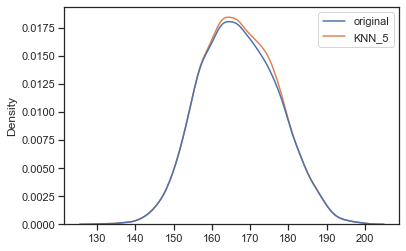

In [46]:
Height_df = pd.DataFrame({'original': knnimpute_hdata['Height'].values})
Height_df['KNN_5'] = knnimpute_hdata_imputed['Height']
sns.kdeplot(data=Height_df)

<AxesSubplot:ylabel='Density'>

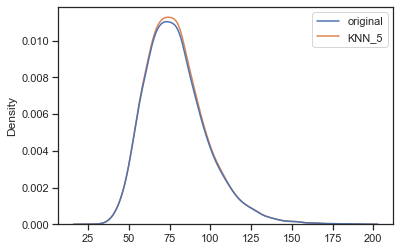

In [47]:
Weight_df = pd.DataFrame({'original': knnimpute_hdata['Weight'].values})
Weight_df['KNN_5'] = knnimpute_hdata_imputed['Weight']
sns.kdeplot(data=Weight_df)

<AxesSubplot:ylabel='Density'>

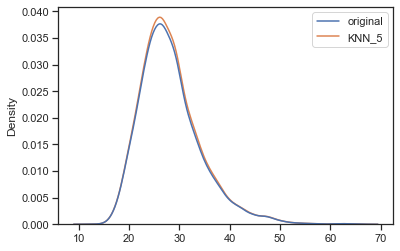

In [48]:
BodyMassIdx_df = pd.DataFrame({'original': knnimpute_hdata['Body Mass Index'].values})
BodyMassIdx_df['KNN_5'] = knnimpute_hdata_imputed['Body Mass Index']
sns.kdeplot(data=BodyMassIdx_df)


(<AxesSubplot:ylabel='Density'>,)

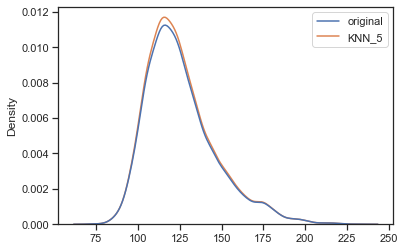

In [71]:
MaxBldPrs_df = pd.DataFrame({'original': knnimpute_hdata['Maximum Blood Pressure'].values})
MaxBldPrs_df['KNN_5'] = knnimpute_hdata_imputed['Maximum Blood Pressure']
sns.kdeplot(data=MaxBldPrs_df)

#### Подбор гиперпараметров

Так как для импьютации используется модель KNN, то возникает необходимость подбора гиперпараметров. В этом случае необходимо создать полный пайплайн машинного обучения и оптимизировать параметры всего пайплайна.

In [49]:
pipe = Pipeline(steps=[
    ('imputer', KNNImputer(
        n_neighbors=5,
        weights='distance',
        add_indicator=False)),
    ('scaler', StandardScaler()),
    ('regressor', Lasso(max_iter=2000)),
])

In [50]:
param_grid = {
    'imputer__n_neighbors': [4,5,6],
    'imputer__weights': ['uniform', 'distance'],
    'imputer__add_indicator': [True, False],
    'regressor__alpha': [10, 100, 200],
}

In [51]:
grid_search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, scoring='r2')

In [52]:
grid_search.fit(knnimpute_hdata, knn_hdata['Source of Care'])

/Users/ctmh/miniforge3/envs/pytorch/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        KNNImputer(weights='distance')),
                                       ('scaler', StandardScaler()),
                                       ('regressor', Lasso(max_iter=2000))]),
             n_jobs=-1,
             param_grid={'imputer__add_indicator': [True, False],
                         'imputer__n_neighbors': [4, 5, 6],
                         'imputer__weights': ['uniform', 'distance'],
                         'regressor__alpha': [10, 100, 200]},
             scoring='r2')

In [53]:
grid_search.best_params_

{'imputer__add_indicator': True,
 'imputer__n_neighbors': 4,
 'imputer__weights': 'uniform',
 'regressor__alpha': 10}

In [54]:
knnimputer2 = KNNImputer(
    n_neighbors=grid_search.best_params_['imputer__n_neighbors'], 
    weights=grid_search.best_params_['imputer__weights'], 
    metric='nan_euclidean', 
    add_indicator=False, 
)
knnimpute_hdata_imputed_temp2 = knnimputer2.fit_transform(knnimpute_hdata)
knnimpute_hdata_imputed2 = pd.DataFrame(knnimpute_hdata_imputed_temp2, columns=knnimpute_hdata.columns)
knnimpute_hdata_imputed2.head()

,Age,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,...,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
0,65.0,56.0,162.1,21.31,0.0,83.6,135.0,71.0,48.0,249.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,36.0,60.2,162.2,22.88,0.0,76.6,96.0,52.0,31.0,135.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,66.0,83.9,162.5,31.77,1.0,113.2,115.0,57.0,44.0,211.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,54.0,69.4,160.5,26.94,0.0,77.9,110.0,57.0,74.0,156.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,63.0,73.1,159.2,28.84,0.0,89.3,132.0,73.0,67.0,154.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:ylabel='Density'>

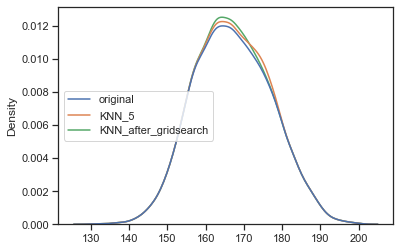

In [55]:
Height_df['KNN_after_gridsearch'] = knnimpute_hdata_imputed2['Height']
sns.kdeplot(data=Height_df)

<AxesSubplot:ylabel='Density'>

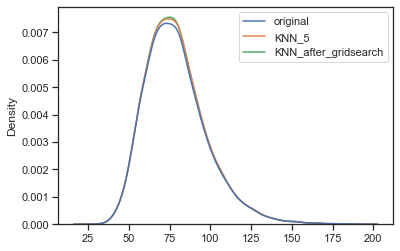

In [56]:
Weight_df['KNN_after_gridsearch'] = knnimpute_hdata_imputed2['Weight']
sns.kdeplot(data=Weight_df)

<AxesSubplot:ylabel='Density'>

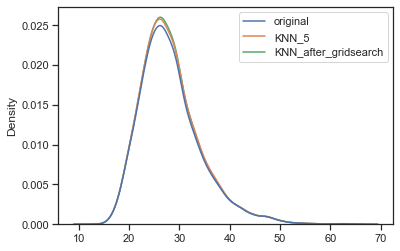

In [57]:
BodyMassIdx_df['KNN_after_gridsearch'] = knnimpute_hdata_imputed2['Body Mass Index']
sns.kdeplot(data=BodyMassIdx_df)

<AxesSubplot:ylabel='Density'>

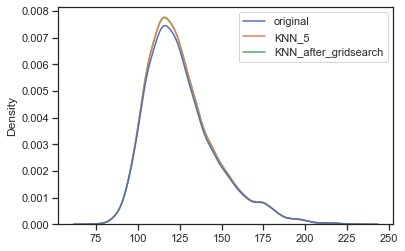

In [72]:
MaxBldPrs_df['KNN_after_gridsearch'] = knnimpute_hdata_imputed2['Maximum Blood Pressure']
sns.kdeplot(data=MaxBldPrs_df)

### Метод  MICE (multivariate Imputation of Chained Equations)

Описание метода и его реализация в пакете [statsmodels.](https://www.statsmodels.org/stable/imputation.html)

**Основные шаги метода:**
1. Используем произвольную импьютацию для всех колонок (например, для числовых колонок - средним значением).
1. Для первой колонки подставляем обратно пустые значения.
1. Пропущенные значения в первой колонке предсказываются с помощью модели машинного обучения  на основе остальных значений.
1. Предсказанные значения подставляются в первую колонку.
1. Действия выше выполняются в цикле для всех колонок.
1. Действия выше выполняются заданное количество раз. Предполагается что на каждой итерации мы постепенно уточняем значения, соответствующие пропускам.


Рассмотрим реализацию [MissForest](https://towardsdatascience.com/missforest-the-best-missing-data-imputation-algorithm-4d01182aed3) с использованием [IterativeImputer.](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html)

In [58]:
imputer_missForest = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=10, random_state=0),
    max_iter=10,
    random_state=0)

In [59]:
%%time
missForest_hdata_imputed_temp = imputer_missForest.fit_transform(knnimpute_hdata)

CPU times: user 1min 29s, sys: 387 ms, total: 1min 29s
Wall time: 1min 29s


/Users/ctmh/miniforge3/envs/pytorch/lib/python3.9/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [60]:
missForest_hdata_imputed = pd.DataFrame(missForest_hdata_imputed_temp, columns=knnimpute_hdata.columns)
missForest_hdata_imputed.head()

,Age,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,...,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
0,65.0,56.0,162.1,21.31,0.0,83.6,135.0,71.0,48.0,249.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,36.0,60.2,162.2,22.88,0.0,76.6,96.0,52.0,31.0,135.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,66.0,83.9,162.5,31.77,1.0,113.2,115.0,57.0,44.0,211.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,54.0,69.4,160.5,26.94,0.0,77.9,110.0,57.0,74.0,156.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,63.0,73.1,159.2,28.84,0.0,89.3,132.0,73.0,67.0,154.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:ylabel='Density'>

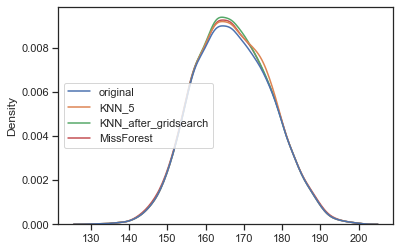

In [61]:
Height_df['MissForest'] = missForest_hdata_imputed['Height']
sns.kdeplot(data=Height_df)

<AxesSubplot:ylabel='Density'>

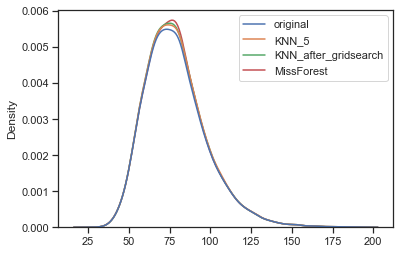

In [62]:
Weight_df['MissForest'] = missForest_hdata_imputed['Weight']
sns.kdeplot(data=Weight_df)

<AxesSubplot:ylabel='Density'>

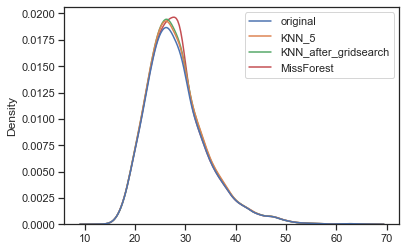

In [63]:
BodyMassIdx_df['MissForest'] = missForest_hdata_imputed['Body Mass Index']
sns.kdeplot(data=BodyMassIdx_df)

Методы KNNImputer и MissForest также реализованы в библиотеке [missingpy.](https://github.com/epsilon-machine/missingpy)

<AxesSubplot:ylabel='Density'>

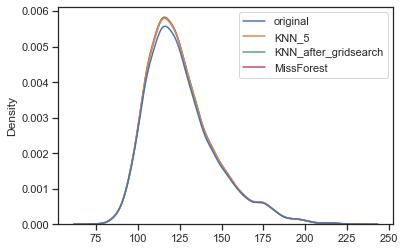

In [73]:
MaxBldPrs_df['MissForest'] = missForest_hdata_imputed['Maximum Blood Pressure']
sns.kdeplot(data=MaxBldPrs_df)